# Recap

This is the terminal:
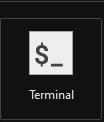

Syntax: command_name -options argument (respect spaces)

*Enter* to submit command.

Autocomplete: TAB

What have you done: cursors

`--help` or `-h`

You interact with a hierarchical file system: /directory/directory/file


## Navigation

`cd ~/notebooks/basics/data` - change directory

`cd ..` - go one directory upwards

`cd ` - go home

`ls` - list files

`less` - look at files

`cat` - print file

`head` or `tail` - only print beginning or end of file

`wc` - word count

`cp` - copy file

`mv` - move file

`rm` - remove file

`wget` - download file from remote source


## Loops 

You can perform the same command multiple times. Very simple:

`for num in 1 2 3; do echo $num; done`

If you have the same task more than once, you loop!

Of course, you may just type 1 2 and 3, but not {1..5984}...

An example: 

`for num in 1 2 3; do cp fileA.txt file$num.txt; done`

Let's check the output.


## Subsetting of files (part I)

Of course, not just looking at files, but retrieving subsets or even changing the content would be useful.
First, we subset a file, that is, we grab ("grep") something (a pattern):

`grep "apple" fileA.txt`

This works for the opposite of the pattern:

`grep -v "apple" fileA.txt`

Or look at this:

`grep -c "apple" fileA.txt`

What is happening here?


## Regular expressions

Let's have a closer look at what can be a "pattern". Maybe we don't want to search for a precise pattern, but rather something of a certain type, something that includes several possible patterns etc. For this, we can use "regular expressions".

For example, in grep (but also other tools):

*Common types*

`|` = or

`.` = any character

`^` = starting position

`$` = end position

`[ ]` = defined ranges, e.g. any digit \[0-9\], some letters \[acde\]

`\` = escape: meaning that a letter behind this character is a “metacharacter“; e.g. using `\s` searches for "spacings" (space key, tabs...), `\n` for new lines

*Some examples*

`grep -E "apple|pear" fileA.txt` = any line with “apple“ or “pear“

`grep -E "[aoi]pple" fileA.txt` = any line with “apple“ or “opple“ or “ipple“

`grep -E ".pple" fileA.txt` = any line with any character followed by “pple“

`grep -E "^3" fileA.txt` = any line starting with “3“


## Subsetting of files (part II)

Files have rows and columns (i.e. we expect them to be tabular, matrices, data frames). The grep command is searching for pattern in each row and spits it to the terminal.

Now, we may want to subset the table by columns. This means, we "cut" certain columns for specific fields:

`cut -f2-3 fileA.txt`

As tables can come in different shapes, it might be that we want to define delimiters. This is done here:

`cut -f2-3 -d " " fileA.txt`

Well, this is not searching for a pattern, as we assume subsetting by columns is categorical, while rows contain specific information. Hence, your tables better be shaped that way.

Now try this command:

`grep -v "apple" fileA.txt | cut -f2-3 > fileE.txt`

What is happening here?


## Piping and streams

Piping means handing over the result of one command into another command. So, above you do a `grep` on a file first, the output is used for the next command `cut`, without printing to the terminal, without intermediate files.

Now, we need to understand what a command does. If you define a file, it reads in the file - internally, this is processed as the input. If the command receives it from a previous command, this is the **"standard input"** stream.

If you tell the command to write into a file, this is the output. Otherwise, it may be printed to the terminal. If you hand it over to another file, it is simply called **"standard output"** stream.

Commands also have another stream for error messages (which obviously should not be written into the output file), which is called the **"standard error"**.

The good thing is that this can be controlled, we can define these streams. The commands so far did not require it, but other tools may need to define it.

Here an example:

`cat fileA.txt | grep -v "apple" - - 2> error.txt | cut -f2-3 > fileE.txt`

Standard input: the input a program takes (from the pipe? or a file?)

Standard output: where to put the output (into the command line? to a file?)

Standard error: where to put any error messages (usually, on the command line)

![image.png](attachment:image.png)

## Subsetting of files (part III)

Sometimes, `grep` and `cut` are not enough. Files may be too complex, you want to select specific things only in specific columns, etc.

There are some solutions to this. One is called `awk`. This is a small *programming language* that is useful for filtering data, even complex and line by line. For example, genotype data where each line is one position in the genome.

We only get the third column here:
`awk '{ print $3 }' fileA.txt`

More complex:

`awk '$2=="apple" { print $3 }' fileA.txt`

`awk 'length($2)==4 { print $2,$3 }' fileA.txt`

This cannot be a complete introduction to `awk`, but it is useful to know it. You can use Google to find the solution to your problem.


## File manipulation: sorting

Sorting just means to look at each row (!) and sort them by their beginning.

`sort fileA.txt`

If you like to take numeric values into account:

`sort -n fileA.txt`

You may also restrict your files to only unique observations:

`uniq fileA.txt`

Try this:

`sort fileA.txt | uniq`

What is happening there?


## Compression

Working with sequencing data means working with files that contain millions of lines. Efficient compression is very important for large files. But it means you often cannot just run the same commands, at least in many cases.

Compressed files will usually have a file extension such as `.tar` or `.gz` or `.tar.gz`.

Unfortunately, parameters are cryptic, especially when tar is involved: Here is a typical way to decompress it:

`tar -zxvf fileA.tar.gz`

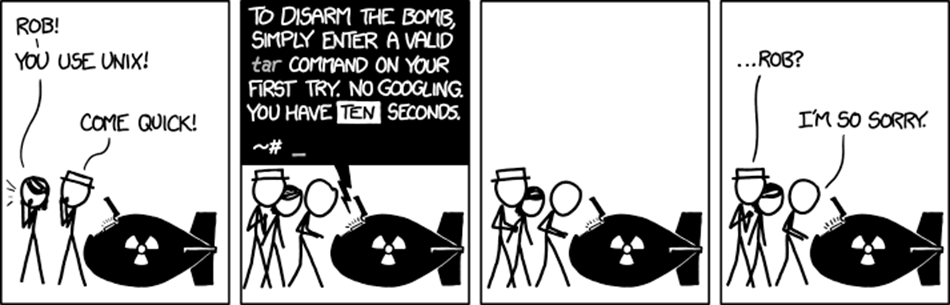

If a file is just compressed with gzip, the simple command is `gunzip`:

`gunzip fileB.txt.gz`

Look at the file! Is it the same as `fileA.txt`?

Some programs can handle compressed files (`less` does the same as `zless`, but `wc` will give you the lines of compressed data).
